In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]


In [4]:
X_train = X_train / 255.

In [5]:
def init_param():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2
    
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        return W1, b1, W2, b2
       

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def get_wrong_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions != Y) / Y.size

def gradient_decent(X, Y, iterations, alpha):
    W1, b1, W2, b2, = init_param()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
            print("Wrong-Accuracy: ", get_wrong_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_decent(X_train, Y_train, 500, 0.4)
#Todos: Accuracy still needs to reach 99, 
#add more complexetiy or a new node layer
#alpha calculation using A2 sorted for predictions == false 

Iteration:  0
[4 0 4 ... 9 4 4] [5 2 3 ... 5 9 5]
Accuracy:  0.06579661016949152
[4 0 4 ... 9 4 4] [5 2 3 ... 5 9 5]
Wrong-Accuracy:  0.9342033898305084
Iteration:  50
[0 3 3 ... 7 9 9] [5 2 3 ... 5 9 5]
Accuracy:  0.5929322033898305
[0 3 3 ... 7 9 9] [5 2 3 ... 5 9 5]
Wrong-Accuracy:  0.4070677966101695
Iteration:  100
[0 2 3 ... 9 9 5] [5 2 3 ... 5 9 5]
Accuracy:  0.761864406779661
[0 2 3 ... 9 9 5] [5 2 3 ... 5 9 5]
Wrong-Accuracy:  0.23813559322033898
Iteration:  150
[5 2 3 ... 9 9 5] [5 2 3 ... 5 9 5]
Accuracy:  0.8266610169491525
[5 2 3 ... 9 9 5] [5 2 3 ... 5 9 5]
Wrong-Accuracy:  0.17333898305084747
Iteration:  200
[5 2 3 ... 9 9 5] [5 2 3 ... 5 9 5]
Accuracy:  0.8584745762711864
[5 2 3 ... 9 9 5] [5 2 3 ... 5 9 5]
Wrong-Accuracy:  0.14152542372881355
Iteration:  250
[5 2 5 ... 9 9 5] [5 2 3 ... 5 9 5]
Accuracy:  0.8721186440677966
[5 2 5 ... 9 9 5] [5 2 3 ... 5 9 5]
Wrong-Accuracy:  0.1278813559322034
Iteration:  300
[5 2 5 ... 9 9 5] [5 2 3 ... 5 9 5]
Accuracy:  0.88084745762

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _,_,_,A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    current_img = X_train[:,index,None]
    prediction = make_predictions(X_train[:,index,None], W1, b1, W2, b2)
    label = Y_train[index]
    print('Success !' if  prediction == label else 'wrong !')
    print("Prediction: ",prediction)
    print("Label: ", label)
    
    current_img = current_img.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_img, interpolation = "nearest")
    plt.show()

Success !
Prediction:  [2]
Label:  2


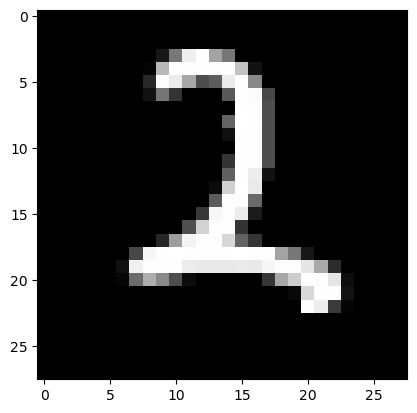

In [9]:
test_predictions(11, W1, b1, W2, b2)

In [10]:
#Use keras to read and form nodes with layers and import model  
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)= mnist.load_data("/kaggle/input/mnistnpz/mnist.npz")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [11]:
train_images =  train_images.reshape((60000,28,28,1))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype("float32")/255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu", input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
#flatten nodes tree
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [13]:
model.compile(optimizer="rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [14]:
model.fit(train_images, train_labels, epochs=8, batch_size=64)

Epoch 1/8
938/938 [==============================] - 33s 33ms/step - loss: 0.1790 - accuracy: 0.9440
Epoch 2/8
938/938 [==============================] - 31s 33ms/step - loss: 0.0472 - accuracy: 0.9859
Epoch 3/8
938/938 [==============================] - 32s 34ms/step - loss: 0.0328 - accuracy: 0.9897
Epoch 4/8
938/938 [==============================] - 31s 33ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 5/8
938/938 [==============================] - 32s 34ms/step - loss: 0.0189 - accuracy: 0.9943
Epoch 6/8
938/938 [==============================] - 32s 34ms/step - loss: 0.0151 - accuracy: 0.9956
Epoch 7/8
938/938 [==============================] - 32s 34ms/step - loss: 0.0120 - accuracy: 0.9964
Epoch 8/8
938/938 [==============================] - 31s 33ms/step - loss: 0.0094 - accuracy: 0.9969


In [15]:
model.evaluate(train_images, train_labels)[1]

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0052 - accuracy: 0.9982


0.9982166886329651